In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
city_data_df = pd.read_csv(os.path.join('Resources', 'city_data.csv'))
ride_data_df = pd.read_csv(os.path.join('Resources', 'ride_data.csv'))

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
city_data_df.groupby(['type']).count()[['city']]

,city
type,
Rural,18
Suburban,36
Urban,66


In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')

In [14]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Creates Data Frames for Each Type of City

In [15]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [16]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### Cities Count for each City Type

In [17]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

### Fare City Average per City Type

In [18]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

### Drivers Average per City Type

In [19]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Urban Bubble Chart

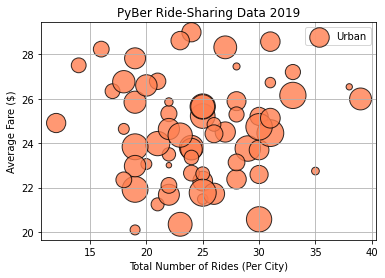

In [37]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral',
    edgecolors='black', linewidth=1, alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

### Suburban Bubble Chart

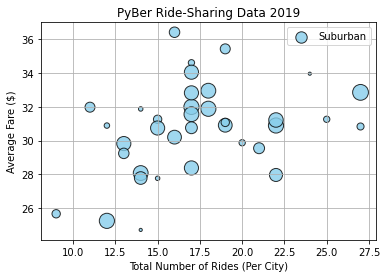

In [43]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban',
    s=10*suburban_driver_count, color='skyblue', edgecolor='black', linewidth=1, alpha=0.8)
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

### Rural Buble Chart

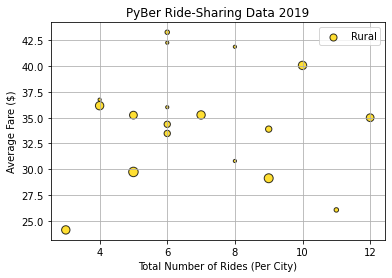

In [49]:
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, label='Rural',
    color='gold', alpha=0.8, linewidth=1, edgecolor='black')
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()